In [ ]:
# Импорт pyspiel и показ поддерживаемых игр
!pip install --upgrade open_spiel
import pyspiel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from open_spiel.python import rl_environment
from open_spiel.python.pytorch import dqn as dqn_pt
from open_spiel.python.algorithms import random_agent
import pickle

#BREAKTHROUGH

In [ ]:
game = "breakthrough"
config = {}

In [ ]:
def eval_against_random_bots(env, trained_agents, random_agents, num_episodes):
  """Evaluates `trained_agents` against `random_agents` for `num_episodes`."""
  num_players = len(trained_agents)
  sum_episode_rewards = np.zeros(num_players)
  for player_pos in range(num_players):
    cur_agents = random_agents[:]
    cur_agents[player_pos] = trained_agents[player_pos]
    for _ in range(num_episodes):
      time_step = env.reset()
      episode_rewards = 0
      while not time_step.last():
        player_id = time_step.observations["current_player"]
        if env.is_turn_based:
          agent_output = cur_agents[player_id].step(
              time_step, is_evaluation=True)
          action_list = [agent_output.action]
        else:
          agents_output = [
              agent.step(time_step, is_evaluation=True) for agent in cur_agents
          ]
          action_list = [agent_output.action for agent_output in agents_output]
        time_step = env.step(action_list)
        episode_rewards += time_step.rewards[player_pos]
      sum_episode_rewards[player_pos] += episode_rewards
  return sum_episode_rewards / num_episodes

In [ ]:
checkpoint_dir = "/tmp/dqn_test"
num_train_episodes = 20000
eval_every = 100

hidden_layers_sizes = [64, 64]
replay_buffer_capacity = int(1e5)
batch_size = 128

In [ ]:
num_players = 2

env = rl_environment.Environment(game, **config)
info_state_size = env.observation_spec()["info_state"][0]
num_actions = env.action_spec()["num_actions"]

# random agents for evaluation
random_agents = [
    random_agent.RandomAgent(player_id=idx, num_actions=num_actions)
    for idx in range(num_players)
]

hidden_layers_sizes = [int(l) for l in hidden_layers_sizes]
# pylint: disable=g-complex-comprehension
agents = [
          dqn_pt.DQN(
          player_id=idx,
          state_representation_size=info_state_size,
          num_actions=num_actions,
          hidden_layers_sizes=hidden_layers_sizes,
          replay_buffer_capacity=replay_buffer_capacity,
          batch_size=batch_size) for idx in range(num_players)
]
result = []

In [ ]:
for ep in range(num_train_episodes):
    if (ep + 1) % eval_every == 0:
        r_mean = eval_against_random_bots(env, agents, random_agents, 100)
        result.append(r_mean)
        print("[%s] Mean episode rewards %s" %(ep + 1, r_mean))

    if (ep + 1) % 5000 == 0:
        with open(f'drive/MyDrive/My/Breakthrough_8*8_DQN/agents_{ep + 1}.pt', 'wb') as f:
            pickle.dump(agents, f)

    time_step = env.reset()
    while not time_step.last():
        player_id = time_step.observations["current_player"]
        if env.is_turn_based:
            agent_output = agents[player_id].step(time_step)
            action_list = [agent_output.action]
        else:
            agents_output = [agent.step(time_step) for agent in agents]
            action_list = [agent_output.action for agent_output in agents_output]
        time_step = env.step(action_list)

    # Episode is over, step all agents with final info state.
    for agent in agents:
        agent.step(time_step)
#result, env, agents

[100] Mean episode rewards [0.1  0.14]
[200] Mean episode rewards [-0.1  -0.04]
[300] Mean episode rewards [-0.3 -0.5]
[400] Mean episode rewards [-0.06 -0.5 ]
[500] Mean episode rewards [-0.26 -0.74]
[600] Mean episode rewards [-0.78 -0.86]
[700] Mean episode rewards [-0.36 -0.9 ]
[800] Mean episode rewards [-0.82 -0.9 ]
[900] Mean episode rewards [-1.  -0.8]
[1000] Mean episode rewards [-1. -1.]
[1100] Mean episode rewards [-1. -1.]
[1200] Mean episode rewards [-1. -1.]
[1300] Mean episode rewards [-1. -1.]
[1400] Mean episode rewards [-1. -1.]
[1500] Mean episode rewards [-1. -1.]
[1600] Mean episode rewards [-1. -1.]
[1700] Mean episode rewards [-1. -1.]
[1800] Mean episode rewards [-1. -1.]
[1900] Mean episode rewards [-1.   -0.98]
[2000] Mean episode rewards [-1. -1.]
[2100] Mean episode rewards [-1. -1.]
[2200] Mean episode rewards [-0.98 -0.98]
[2300] Mean episode rewards [-1.   -0.96]
[2400] Mean episode rewards [-0.94 -0.88]
[2500] Mean episode rewards [-0.92 -0.68]
[2600] Me

FileNotFoundError: ignored

In [ ]:
for ep in range(5000, num_train_episodes):
    if (ep + 1) % eval_every == 0:
        r_mean = eval_against_random_bots(env, agents, random_agents, 100)
        result.append(r_mean)
        print("[%s] Mean episode rewards %s" %(ep + 1, r_mean))

    if (ep + 1) % 5000 == 0:
        with open(f'drive/MyDrive/My/Breakthrough_8*8_DQN/agents_{ep + 1}.pt', 'wb') as f:
            pickle.dump(agents, f)

    time_step = env.reset()
    while not time_step.last():
        player_id = time_step.observations["current_player"]
        if env.is_turn_based:
            agent_output = agents[player_id].step(time_step)
            action_list = [agent_output.action]
        else:
            agents_output = [agent.step(time_step) for agent in agents]
            action_list = [agent_output.action for agent_output in agents_output]
        time_step = env.step(action_list)

    # Episode is over, step all agents with final info state.
    for agent in agents:
        agent.step(time_step)
#result, env, agents

[5100] Mean episode rewards [0.08 0.26]
[5200] Mean episode rewards [0.14 0.24]
[5300] Mean episode rewards [0.34 0.34]
[5400] Mean episode rewards [0.2  0.38]
[5500] Mean episode rewards [0.22 0.4 ]
[5600] Mean episode rewards [0.46 0.42]
[5700] Mean episode rewards [0.46 0.52]
[5800] Mean episode rewards [0.5  0.52]
[5900] Mean episode rewards [0.64 0.62]
[6000] Mean episode rewards [0.6  0.54]
[6100] Mean episode rewards [0.7  0.62]
[6200] Mean episode rewards [0.58 0.52]
[6300] Mean episode rewards [0.58 0.66]
[6400] Mean episode rewards [0.68 0.72]
[6500] Mean episode rewards [0.68 0.76]
[6600] Mean episode rewards [0.84 0.76]
[6700] Mean episode rewards [0.76 0.86]
[6800] Mean episode rewards [0.8  0.82]
[6900] Mean episode rewards [0.76 0.94]
[7000] Mean episode rewards [0.8  0.92]
[7100] Mean episode rewards [0.82 0.86]
[7200] Mean episode rewards [0.84 0.94]
[7300] Mean episode rewards [0.9  0.94]
[7400] Mean episode rewards [0.92 0.96]
[7500] Mean episode rewards [0.94 0.92]


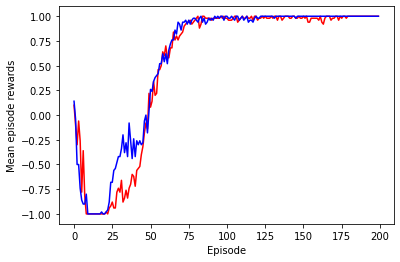

In [ ]:
import matplotlib.pyplot as plt

pt_result = result

ep = [x for x in range(len(pt_result))]
pt_r_mean0 = [y[0] for y in pt_result]
pt_r_mean1 = [y[1] for y in pt_result]

plt.plot(ep,pt_r_mean0, c='red')
plt.plot(ep,pt_r_mean1, c='blue')
plt.xlabel('Episode')
plt.ylabel('Mean episode rewards')
plt.show()

In [ ]:
with open('drive/MyDrive/My/breakthrough_8*8/agents_BREAKTHROUGH.pt', 'wb') as f:
    pickle.dump(agents, f)

In [ ]:
with open('drive/MyDrive/My/Breakthrough_8*8_DQN/agents_20000.pt', 'rb') as f:
    Agents = pickle.load(f)

In [ ]:
# Проверка качества игры. Игра с человеком

MY_TURN = 0
RIVAL_TURN = 1
#Agents = agents

time_step = env.reset()
print(env.get_state)
while not time_step.last():
    player_id = time_step.observations["current_player"]
    print(time_step.observations["legal_actions"][player_id])
    if player_id == RIVAL_TURN:
        agent_output = Agents[player_id].step(time_step)
        action_list = [agent_output.action]
    elif player_id == MY_TURN:
        action_list = [int(input())]
    time_step = env.step(action_list)
    print(env.get_state)
    print()
for agent in Agents:
    agent.step(time_step)

8bbbbbbbb
7bbbbbbbb
6........
5........
4........
3........
2wwwwwwww
1wwwwwwww
 abcdefgh

[98, 100, 108, 110, 112, 120, 122, 124, 132, 134, 136, 144, 146, 148, 156, 158, 160, 168, 170, 172, 180, 182]
122
8bbbbbbbb
7bb.bbbbb
6..b.....
5........
4........
3........
2wwwwwwww
1wwwwwwww
 abcdefgh


[584, 586, 594, 596, 598, 606, 608, 610, 618, 620, 622, 630, 632, 634, 642, 644, 646, 654, 656, 658, 666, 668]
8bbbbbbbb
7bb.bbbbb
6..b.....
5........
4........
3.w......
2.wwwwwww
1wwwwwwww
 abcdefgh


[16, 26, 36, 98, 100, 108, 110, 134, 136, 144, 146, 148, 156, 158, 160, 168, 170, 172, 180, 182, 216, 218, 220]
168
8bbbbbbbb
7bb.bbb.b
6..b..b..
5........
4........
3.w......
2.wwwwwww
1wwwwwwww
 abcdefgh


[498, 500, 502, 594, 598, 608, 610, 618, 620, 622, 630, 632, 634, 642, 644, 646, 654, 656, 658, 666, 668, 680, 690]
8bbbbbbbb
7bb.bbb.b
6..b..b..
5........
4..w.....
3........
2.wwwwwww
1wwwwwwww
 abcdefgh


[16, 26, 36, 64, 74, 84, 98, 100, 108, 110, 134, 136, 144, 146, 156, 160, 180, 182, 